<a href="https://colab.research.google.com/github/AmeliaAdhariani/Skripsi/blob/main/visualisasi_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Library**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
file_path = '/content/2clustered_data.xlsx'
data = pd.read_excel(file_path)
data.head()

,wilayah,Bulan,Anirat,Curat,Curas,Curanmor,Peras/ Anc,Cluster,Kategori Cluster,Longitude,Latitude
0,A,Januari,9,10,0,36,2,0,Rawan,-6.391330,106.822133
1,B,Januari,1,9,2,11,0,2,Sedang,-6.375731,106.814030
2,C,Januari,1,6,1,49,1,2,Sedang,-6.402093,106.849351
3,D,Januari,6,11,0,36,2,0,Rawan,-6.394864,106.798391
4,E,Januari,2,4,0,13,1,1,Tidak Rawan,-6.388472,106.867319


In [ ]:
# Calculate the total crime rate for each month
data['Total_Crime'] = data['Anirat'] + data['Curat'] + data['Curas'] + data['Curanmor'] + data['Peras/ Anc']

# Create the scatter plot
chart = alt.Chart(data).mark_circle().encode(
    x='Bulan',
    y='Total_Crime',
    color='Cluster:N',  # Color points by cluster
    tooltip=['wilayah', 'Bulan', 'Total_Crime', 'Cluster']
).facet(
    column='wilayah' # Create a separate chart for each region
).properties(
    title='Scatter Plot of Total Crime Rate by Month and Cluster'
)
chart

alt.FacetChart(...)

In [ ]:
# Change the column name to 'Total_Kriminal' (without space)
data['Total_Kriminal'] = data['Anirat'] + data['Curat'] + data['Curas'] + data['Curanmor'] + data['Peras/ Anc']

# Create the scatter plot
chart = alt.Chart(data).mark_circle().encode(
    x='Bulan',
    y='Total_Kriminal',  # Use the corrected column name here
    color='Cluster:N',  # Color points by cluster
    tooltip=['wilayah', 'Bulan', 'Total_Kriminal', 'Cluster'] # Use the corrected column name here
).properties(
    title='Diagram Pencar Cluster Berdasarkan Bulan'
)

# Combine all months and regions into a single chart
chart

alt.Chart(...)

In [ ]:
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Calculate the total crime rate for each month
data['Total_Kriminal'] = data['Anirat'] + data['Curat'] + data['Curas'] + data['Curanmor'] + data['Peras/ Anc']

# Create the scatter plot with specified month order
chart = alt.Chart(data).mark_circle().encode(
    x=alt.X('Bulan', sort=month_order, axis=alt.Axis(title='Bulan')),
    y='Total_Kriminal',
    color='Cluster:N',
    tooltip=['wilayah', 'Bulan', 'Total_Kriminal', 'Cluster']
).properties(
    title='Diagram Pencar Cluster Berdasarkan Bulan',
    width=600,
    height=400
)

chart

alt.Chart(...)

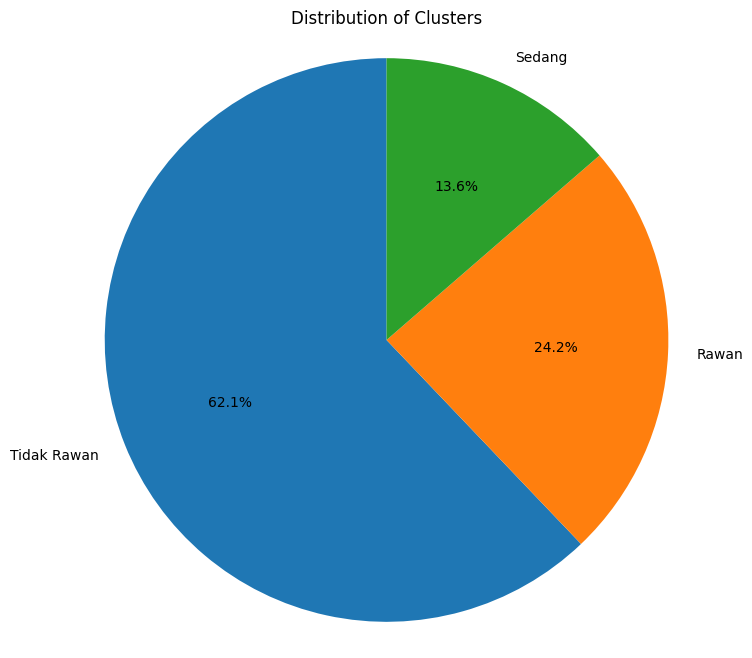

In [ ]:
# Assuming 'cluster' column exists in your DataFrame
cluster_counts = data['Kategori Cluster'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Melihat kolom dari dataset
data.columns

Index(['wilayah', 'Bulan', 'Anirat', 'Curat', 'Curas', 'Curanmor',
       'Peras/ Anc', 'Cluster', 'Kategori Cluster', 'Total_Crime',
       'Total_Kriminal'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Wilayah     132 non-null    object
 1   Bulan       132 non-null    object
 2   Anirat      132 non-null    int64 
 3   Curat       132 non-null    int64 
 4   Curas       132 non-null    int64 
 5   Curanmor    132 non-null    int64 
 6   Peras/ Anc  132 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 7.3+ KB


In [ ]:
data.describe()

,Anirat,Curat,Curas,Curanmor,Peras/ Anc
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2.712121,4.265152,0.227273,12.522727,0.719697
std,2.835248,3.899226,0.546898,16.700535,1.180726
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,4.000000,0.000000,6.000000,0.000000
75%,4.000000,6.000000,0.000000,19.250000,1.000000
max,13.000000,21.000000,2.000000,103.000000,7.000000


In [ ]:
data.shape

(132, 7)

In [ ]:
# Data preprocessing
# Handling missing values (replace with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Select only numerical features for imputation
numerical_features = data.select_dtypes(include=np.number).drop(columns=['Bulan'], errors='ignore')  # errors='ignore' to handle if 'Bulan' is already dropped
data_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# Reattach the Bulan and Wilayah columns
data_imputed['Bulan'] = data['Bulan']
data_imputed['Wilayah'] = data['Wilayah'] # Reattach the Wilayah column

## **Data Pre-Processing**

In [ ]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Wilayah       0
Bulan         0
Anirat        0
Curat         0
Curas         0
Curanmor      0
Peras/ Anc    0
dtype: int64


**Standarisasi**

In [ ]:
# Standardize the data
scaler = StandardScaler()
# Re-define features to include the necessary columns for standardization
features = data[['Anirat', 'Curat', 'Curas', 'Curanmor', 'Peras/ Anc']]
scaled_features = scaler.fit_transform(features)

# Optional: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means with an arbitrary number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)

**Normaliasasi**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Memilih kolom numerik (mengabaikan kolom "Wilayah" dan "Bulan")
data_numerical = data.select_dtypes(include=np.number)  # Select only numeric columns

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data_numerical)
data_min_max_scaled_df = pd.DataFrame(data_min_max_scaled, columns=data_numerical.columns)

# Menampilkan hasil
print("Data setelah Min-Max Scaling:")
print(data_min_max_scaled_df.head())

Data setelah Min-Max Scaling:
     Anirat     Curat  Curas  Curanmor  Peras/ Anc
0  0.692308  0.476190    0.0  0.349515    0.285714
1  0.076923  0.428571    1.0  0.106796    0.000000
2  0.076923  0.285714    0.5  0.475728    0.142857
3  0.461538  0.523810    0.0  0.349515    0.285714
4  0.153846  0.190476    0.0  0.126214    0.142857


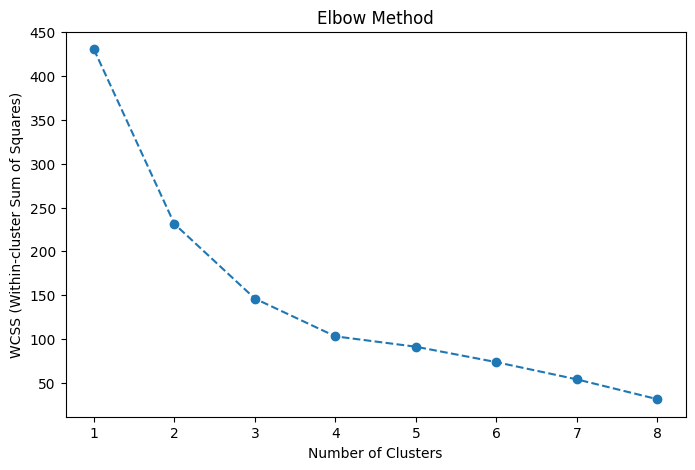

In [ ]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [ ]:
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


For n_clusters = 2, the average silhouette score is: 0.5075580603791141


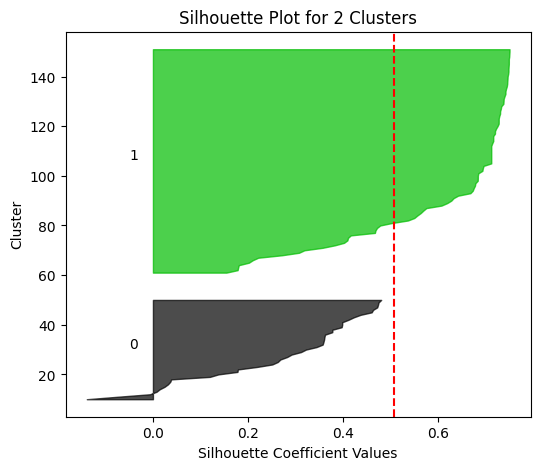

For n_clusters = 3, the average silhouette score is: 0.5470631782241987


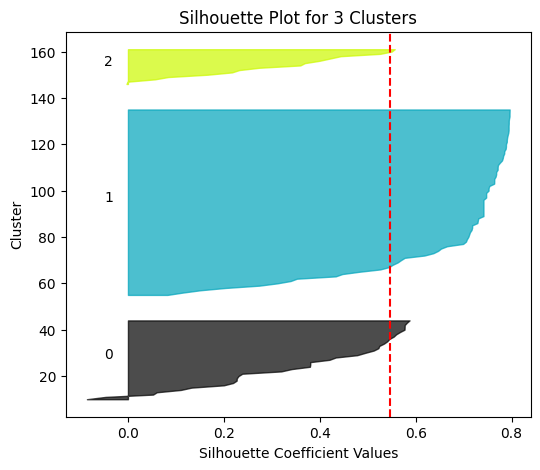

For n_clusters = 4, the average silhouette score is: 0.5315376065987576


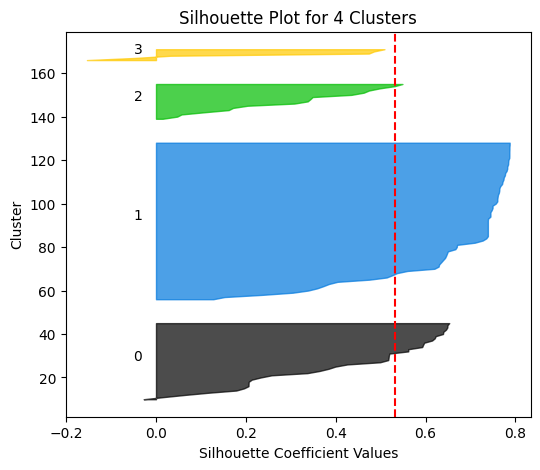

For n_clusters = 5, the average silhouette score is: 0.5065261222156261


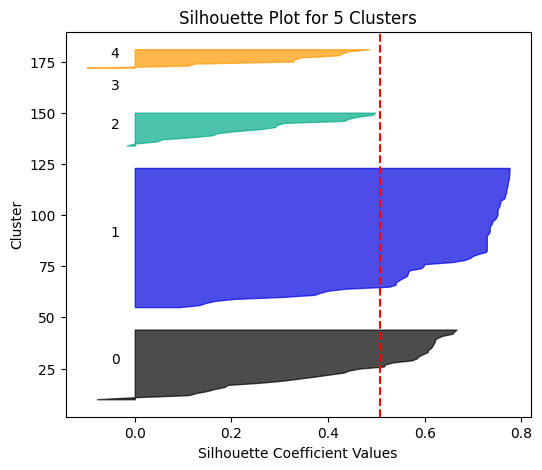

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Silhouette Analysis to find the optimal number of clusters
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_features)

    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_features, cluster_labels)

    y_lower = 10
    plt.figure(figsize=(6, 5))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.title(f"Silhouette Plot for {n_clusters} Clusters")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

**Visualisasi menggunakan PCA -reduced features**


Closest Centroid for Each Data Point:
[0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


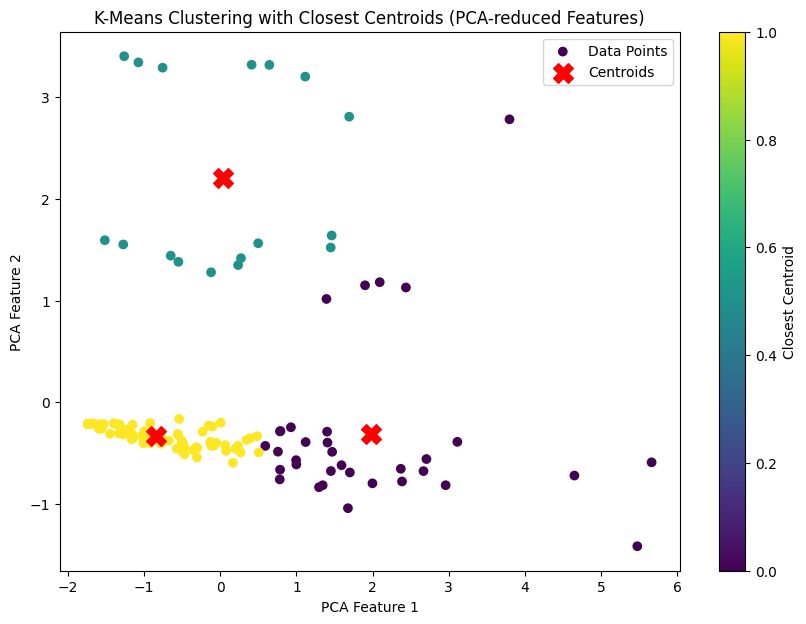

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Example: 3 clusters
kmeans.fit(pca_features)
centroids = kmeans.cluster_centers_
# Find the closest centroid for each data point
closest_centroids = []
for i in range(len(pca_features)):
    distances = np.linalg.norm(pca_features[i] - centroids, axis=1)
    closest_centroid_index = np.argmin(distances)
    closest_centroids.append(closest_centroid_index)

# Print the closest centroid for each data point
print("Closest Centroid for Each Data Point:")
print(closest_centroids)

# Visualize the closest centroids
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=closest_centroids, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Closest Centroids (PCA-reduced Features)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Closest Centroid')
plt.legend()
plt.show()

 **Elbow Method menggunaka WCSS (Within -Cluster Sum of Squares**

In [ ]:
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_features)

    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette score is: 0.5075580603791141
For n_clusters = 3, the average silhouette score is: 0.5470631782241987
For n_clusters = 4, the average silhouette score is: 0.5315376065987576
For n_clusters = 5, the average silhouette score is: 0.5065261222156261


In [ ]:
# prompt: Buatkanlah data frame untuk hasil cluster diatas dan labelnya menjadi rawan, tidak rawan, dan sedang berdasarkan hasil clusternya

# Assuming 'kmeans_labels' contains the cluster assignments from your KMeans model
# and 'data' is your original DataFrame

# Create a mapping from cluster labels to risk categories
cluster_mapping = {
    0: 'rawan',
    1: 'tidak rawan',
    2: 'sedang'
    # Add more mappings if you have more clusters
}

# Create a new column 'Risk_Category' based on the cluster assignments
data['Risk_Category'] = data['Cluster'].map(cluster_mapping)

# Display the DataFrame with the new 'Risk_Category' column
data

,Wilayah,Bulan,Anirat,Curat,Curas,Curanmor,Peras/ Anc,Cluster,Risk_Category
0,A,Januari,9,10,0,36,2,0,rawan
1,B,Januari,1,9,2,11,0,2,sedang
2,C,Januari,1,6,1,49,1,2,sedang
3,D,Januari,6,11,0,36,2,0,rawan
4,E,Januari,2,4,0,13,1,1,tidak rawan
...,...,...,...,...,...,...,...,...,...
127,G,Desember,2,1,0,1,0,1,tidak rawan
128,H,Desember,4,2,0,0,1,1,tidak rawan
129,I,Desember,0,0,0,1,0,1,tidak rawan
130,J,Desember,3,1,0,0,0,1,tidak rawan


In [ ]:
#mendowload hasil clustering
final_df.to_excel('bisajadi_data.xlsx', index=False)  # Save to Excel without the index

In [ ]:
# Create a new DataFrame for the table
cluster_data = pd.DataFrame({
    'Anirat': data['Anirat'],
    'wilayah': data['Wilayah'],
    'Bulan': data['Bulan'],
    'Curat': data['Curat'],
    'Curas': data['Curas'],
    'Curanmor': data['Curanmor'],
    'Peras/ Anc': data['Peras/ Anc'],
    'Cluster': data['Cluster']
})

# Display the table
cluster_data

,Anirat,wilayah,Bulan,Curat,Curas,Curanmor,Peras/ Anc,Cluster
0,9,A,Januari,10,0,36,2,0
1,1,B,Januari,9,2,11,0,2
2,1,C,Januari,6,1,49,1,2
3,6,D,Januari,11,0,36,2,0
4,2,E,Januari,4,0,13,1,1
...,...,...,...,...,...,...,...,...
127,2,G,Desember,1,0,1,0,1
128,4,H,Desember,2,0,0,1,1
129,0,I,Desember,0,0,1,0,1
130,3,J,Desember,1,0,0,0,1


In [ ]:
# Save the DataFrame to an Excel file
cluster_data.to_excel('clustered_data.xlsx', index=False)